## Manchester United vs Leicester City data

In [24]:
import json
import pandas as pd
with open("/Users/mayankkedia/code/epl-twitter/spark/manu_leicester_wf.json", 'r') as f:
    cl = json.load(f)


### Constructing First Half array

In [6]:
first_half_length = 51
first_half_start = 11405
cl_keys = [int(x) for x in sorted(cl.keys())]

In [9]:
first_half_keys = [str(x) for x in range(1,46)]

In [12]:
first_half_keys.extend(["+"+str(x) for x in range(1,first_half_length - 44)])

#### Constructing word list.csv

In [26]:
word = sorted([x.encode('utf-8') for x in cl[str(first_half_start)].keys()])
index = range(0, len(word))

In [28]:
df = pd.DataFrame({"word":word, "index":index})

In [42]:
df.to_csv("ml_word_list.csv", header=True, index=False)

#### Constructing the data array 
Format is array of arrays 

    [
    [12, 2,3, 4, 22, 11, "1"], 
    ...
    ]
    
The idea being that the index in the csv is the index in the row array where
the frequency of the word is 

In [5]:
def construct_half_time_data(cl, cl_keys, half_keys, half_length, half_start, word_list):
    start_recording = False
    counter = 0
    data = []
    for clk in cl_keys:
        if clk == half_start:
            start_recording = True

        if counter == half_length:
            break

        if start_recording:
            row_data = []
            for w in word_list:
                row_data.append(cl[str(clk)][w])
            row_data.append(half_keys[counter])
            ## Data is stored in arrays of arrays
            counter +=1
            data.append(row_data)
    return data

In [36]:
first_half_data = construct_half_time_data(cl, 
                                           cl_keys, 
                                           first_half_keys, 
                                           first_half_length, 
                                           first_half_start, 
                                           word)

### Second Half for Manu Leicester

In [37]:
second_half_length = 50
second_half_start = 11506
cl_keys = [int(x) for x in sorted(cl.keys())]

second_half_keys = [str(x) for x in range(46,91)]
second_half_keys.extend(["+"+str(x) for x in range(1,second_half_length - 44)])

In [38]:
second_half_data = construct_half_time_data(cl, 
                                            cl_keys, 
                                            second_half_keys, 
                                            second_half_length, 
                                            second_half_start, 
                                           word)

In [40]:
manu_leicester_wf_data = [first_half_data, second_half_data]

In [41]:
with open("manu_leicester_wf.json", 'wb') as f:
    json.dump(manu_leicester_wf_data, f)

## Chelsea vs Spurs 

In [1]:
import json
import pandas as pd
with open("/Users/mayankkedia/code/epl-twitter/spark/chelsea_tottenham_spark_output_wf.json", 'r') as f:
    cl = json.load(f)

In [2]:
first_half_length = 48
first_half_start = 21900
cl_keys = [int(x) for x in sorted(cl.keys())]
first_half_keys = [str(x) for x in range(1,46)]
first_half_keys.extend(["+"+str(x) for x in range(1,first_half_length - 44)])

In [3]:

word = sorted([x.encode('utf-8') for x in cl[str(first_half_start)].keys()])
index = range(0, len(word))
df = pd.DataFrame({"word":word, "index":index})
df.to_csv("chelsea_tottenham_word_list.csv", header=True, index=False)

In [6]:
first_half_data = construct_half_time_data(cl, 
                                           cl_keys, 
                                           first_half_keys, 
                                           first_half_length, 
                                           first_half_start, 
                                           word)

In [9]:

second_half_length = 51
second_half_start = 22003
cl_keys = [int(x) for x in sorted(cl.keys())]

second_half_keys = [str(x) for x in range(46,91)]
second_half_keys.extend(["+"+str(x) for x in range(1,second_half_length - 44)])

In [10]:

second_half_data = construct_half_time_data(cl, 
                                            cl_keys, 
                                            second_half_keys, 
                                            second_half_length, 
                                            second_half_start, 
                                           word)

In [11]:
chelsea_tottenham_wf_data = [first_half_data, second_half_data]


In [13]:
with open("chelsea_tottenham_wf.json", 'wb') as f:
    json.dump(chelsea_tottenham_wf_data, f)

In [15]:
a = chelsea_tottenham_wf_data[0]

In [16]:
a.extend(chelsea_tottenham_wf_data[1])

In [17]:
len(a)

99

In [29]:
frequencies = map(lambda x: x[16], a)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 41.,  18.,  17.,   8.,   5.,   3.,   3.,   1.,   1.,   2.]),
 array([  0. ,   5.9,  11.8,  17.7,  23.6,  29.5,  35.4,  41.3,  47.2,
         53.1,  59. ]),
 <a list of 10 Patch objects>)

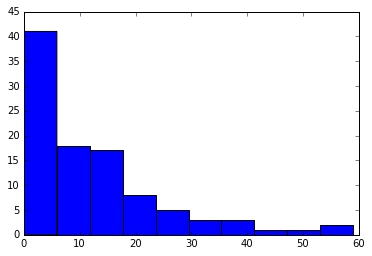

In [31]:
plt.hist(frequencies)

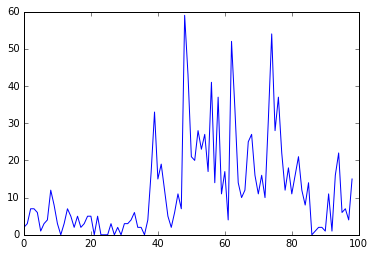

In [32]:
plt.plot(frequencies)